In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

import lime
import lime.lime_tabular

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from notebooks.data_generation import generate_challenge_dataset

In [2]:
n_useless_features = 1
x, y = generate_challenge_dataset(n_useless_features)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

clf = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)

clf.fit(x_train, y_train)

y_pred_train = clf.predict(x_train)
acc_train = accuracy_score(y_train, y_pred_train)
print("Train Accuracy:", acc_train)

y_pred_test = clf.predict(x_test)
acc_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", acc_test)

Train Accuracy: 0.98625
Test Accuracy: 0.8325


In [3]:
explain_index = 200
num_features = x_train.shape[1]
feature_names = [str(idx) for idx in range(1, num_features + 1)]

In [4]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    x_train,
    mode="classification",
    feature_names=feature_names,
    class_names=["y=0", "y=1"],
    verbose=False,
    discretize_continuous=False,
)

In [5]:
# This will not work right away
# explanation = explainer.explain_instance(
#     x_test[explain_index],
#     clf.predict,
#     num_features=num_features,
# )

In [6]:
predict_probability = lambda x: clf.predict_proba(x).astype(float)
explanation = explainer.explain_instance(
    x_test[explain_index],
    predict_probability,
    num_features=num_features,
)

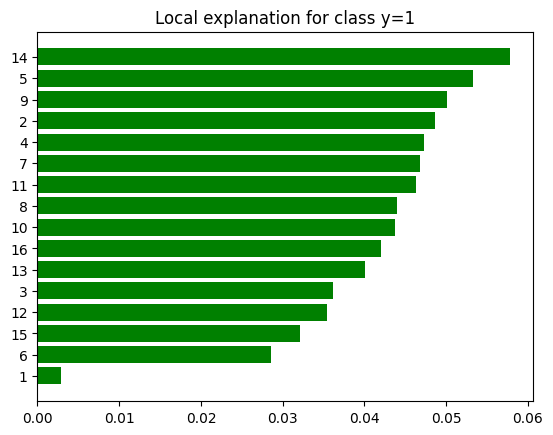

In [7]:
%matplotlib inline
fig = explanation.as_pyplot_figure()

In [8]:
print(explanation)

In [9]:
def print_attributes(my_object):
    print(
        "\n".join(
            [
                attribute
                for attribute in dir(my_object)
                if not attribute.startswith("_")
            ]
        )
    )

In [10]:
print_attributes(explanation)

as_html
as_list
as_map
as_pyplot_figure
available_labels
class_names
domain_mapper
intercept
local_exp
local_pred
mode
predict_proba
random_state
save_to_file
score
show_in_notebook
top_labels


In [12]:
print(explanation.local_exp)
print(explanation.as_list())

{1: [(np.int64(13), np.float64(0.05779474790087136)), (np.int64(4), np.float64(0.053255287935025236)), (np.int64(8), np.float64(0.05005172008604432)), (np.int64(1), np.float64(0.048587851511058745)), (np.int64(3), np.float64(0.047236046748189)), (np.int64(6), np.float64(0.04677927608395813)), (np.int64(10), np.float64(0.04634902898835421)), (np.int64(7), np.float64(0.04398488530100034)), (np.int64(9), np.float64(0.0437604725408394)), (np.int64(15), np.float64(0.04197561569126301)), (np.int64(12), np.float64(0.04005484172651183)), (np.int64(2), np.float64(0.03610552400422464)), (np.int64(11), np.float64(0.0354708380831181)), (np.int64(14), np.float64(0.03208891662728819)), (np.int64(5), np.float64(0.028515858194281207)), (np.int64(0), np.float64(0.0028240938100112466))]}
[('14', 0.05779474790087136), ('5', 0.053255287935025236), ('9', 0.05005172008604432), ('2', 0.048587851511058745), ('4', 0.047236046748189), ('7', 0.04677927608395813), ('11', 0.04634902898835421), ('8', 0.043984885301

In [ ]:
avg_useful_lime_importances_list = []
useless_feature_lime_importances_list = []

first_useful_feature = 2

useless_feature = 1
useful_features = np.arange(first_useful_feature, num_features - 1)

for idx in range(len(x_test)):
    explanation = explainer.explain_instance(
        x_test[idx],
        predict_probability,
        num_features=num_features,
    )
    explanation_dictionary = {
        feature: value for feature, value in explanation.as_list()
    }
    lime_importances = np.array(explanation.as_list(), dtype=np.float32)
    useless_feature_lime_importance = lime_importances[
        lime_importances[:, 0] == useless_feature
    ]
    useful_lime_importances = lime_importances[
        np.isin(lime_importances[:, 0], list(useful_features))
    ][:, 1]
    avg_useful_lime_importance = np.average(useful_lime_importances)
    avg_useful_lime_importances_list.append(avg_useful_lime_importance)
    useless_feature_lime_importances_list.append(
        useless_feature_lime_importance
    )

array([[1.0000000e+00, 8.9880853e-04]], dtype=float32)

array([0.05943749, 0.05790675, 0.05271405, 0.05162381, 0.05137222,
       0.05090282, 0.0493785 , 0.0493139 , 0.04651287, 0.04515396,
       0.03873273, 0.03767584, 0.02922515], dtype=float32)